# Intro
## Dataset
- https://www.kaggle.com/datasets/somesh24/spambase?resource=download
## Goal
Binary classification model trained for spam detection

# External Imports

In [1]:
import kagglehub
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix
from IPython.display import Markdown

# Internal Imports

In [2]:
from download_dataset import download_dataset
from skewed_data import shapiro_test, skewness_correction

# Download dataset and read it as an csv

In [3]:
dataset = download_dataset("somesh24/spambase")
dataset = pd.read_csv(f'{dataset}', encoding = "ISO-8859-1")
dataset.head(10)

The destination './dataset' is not empty. Assuming it contains the desired dataset. Skipping download.


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


# Dataset statistics

In [4]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Analysis
- Dataset seem to not have any missing data in any column
- Differences between 75% and max are big for columns:
    - `capital_run_length_average`
    - `capital_run_length_longest`
    - `capital_run_length_total`
      All of those columns describe the appearance of capital letters that appeard in the e-mails. Those differences seem to be reasonable when we take into the account that some e-mails will be wrote entirely with the capital letters. Most e-mails won't be written that way though
- Every column in the dataset seem to be right-skewed
- Most columns consist mostly of zeros

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Skewed features

In [6]:
skewed = shapiro_test(dataset)
skewed

,column,p_value,normality
0,word_freq_make,1.498811e-82,False
1,word_freq_address,3.879271e-90,False
2,word_freq_all,1.869711e-72,False
3,word_freq_3d,4.282842e-93,False
4,word_freq_our,1.594122e-77,False
5,word_freq_over,3.543808e-82,False
6,word_freq_remove,1.062522e-84,False
7,word_freq_internet,3.276530e-86,False
8,word_freq_order,3.718693e-83,False
9,word_freq_mail,6.112762e-82,False


## Corelation with `class`

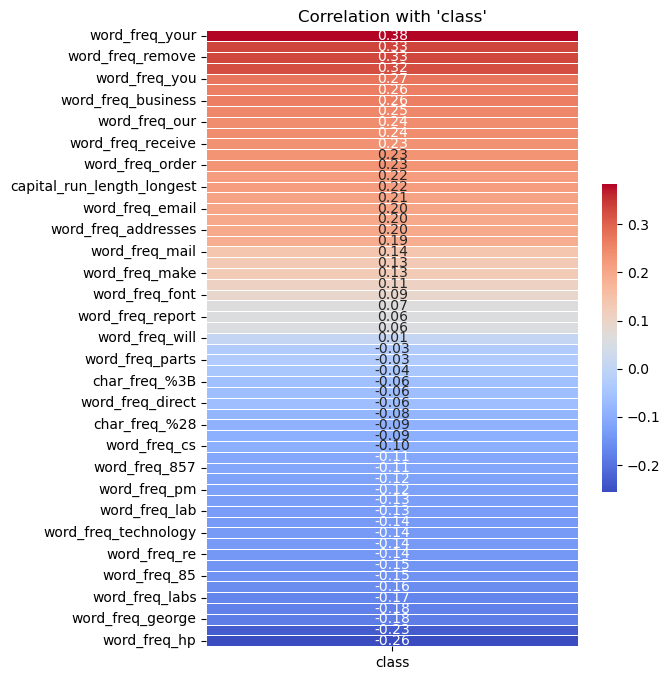

In [7]:
correlation_matrix = dataset.corr()

class_correlation = correlation_matrix[['class']].drop(index='class').sort_values(by='class', ascending=False)

plt.figure(figsize=(6, 8))

sns.heatmap(
    class_correlation, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f", 
    annot_kws={"size": 10}, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.5}
)

plt.title("Correlation with 'class'", fontsize=12)
plt.show()

## Top 5 most influential features

### Function for displaying correlations in the right upper corner

In [8]:
def heatmap_corrfunc(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    
    global corr_min, corr_max
    norm = plt.Normalize(vmin=corr_min, vmax=corr_max)
    cmap = plt.cm.coolwarm
    color = cmap(norm(corr))
    
    ax.set_facecolor(color)
    ax.annotate(f"{corr:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes, 
                ha="center", va="center", fontsize=12, fontweight="bold", 
                color="white" if abs(corr) > 0.5 else "black")

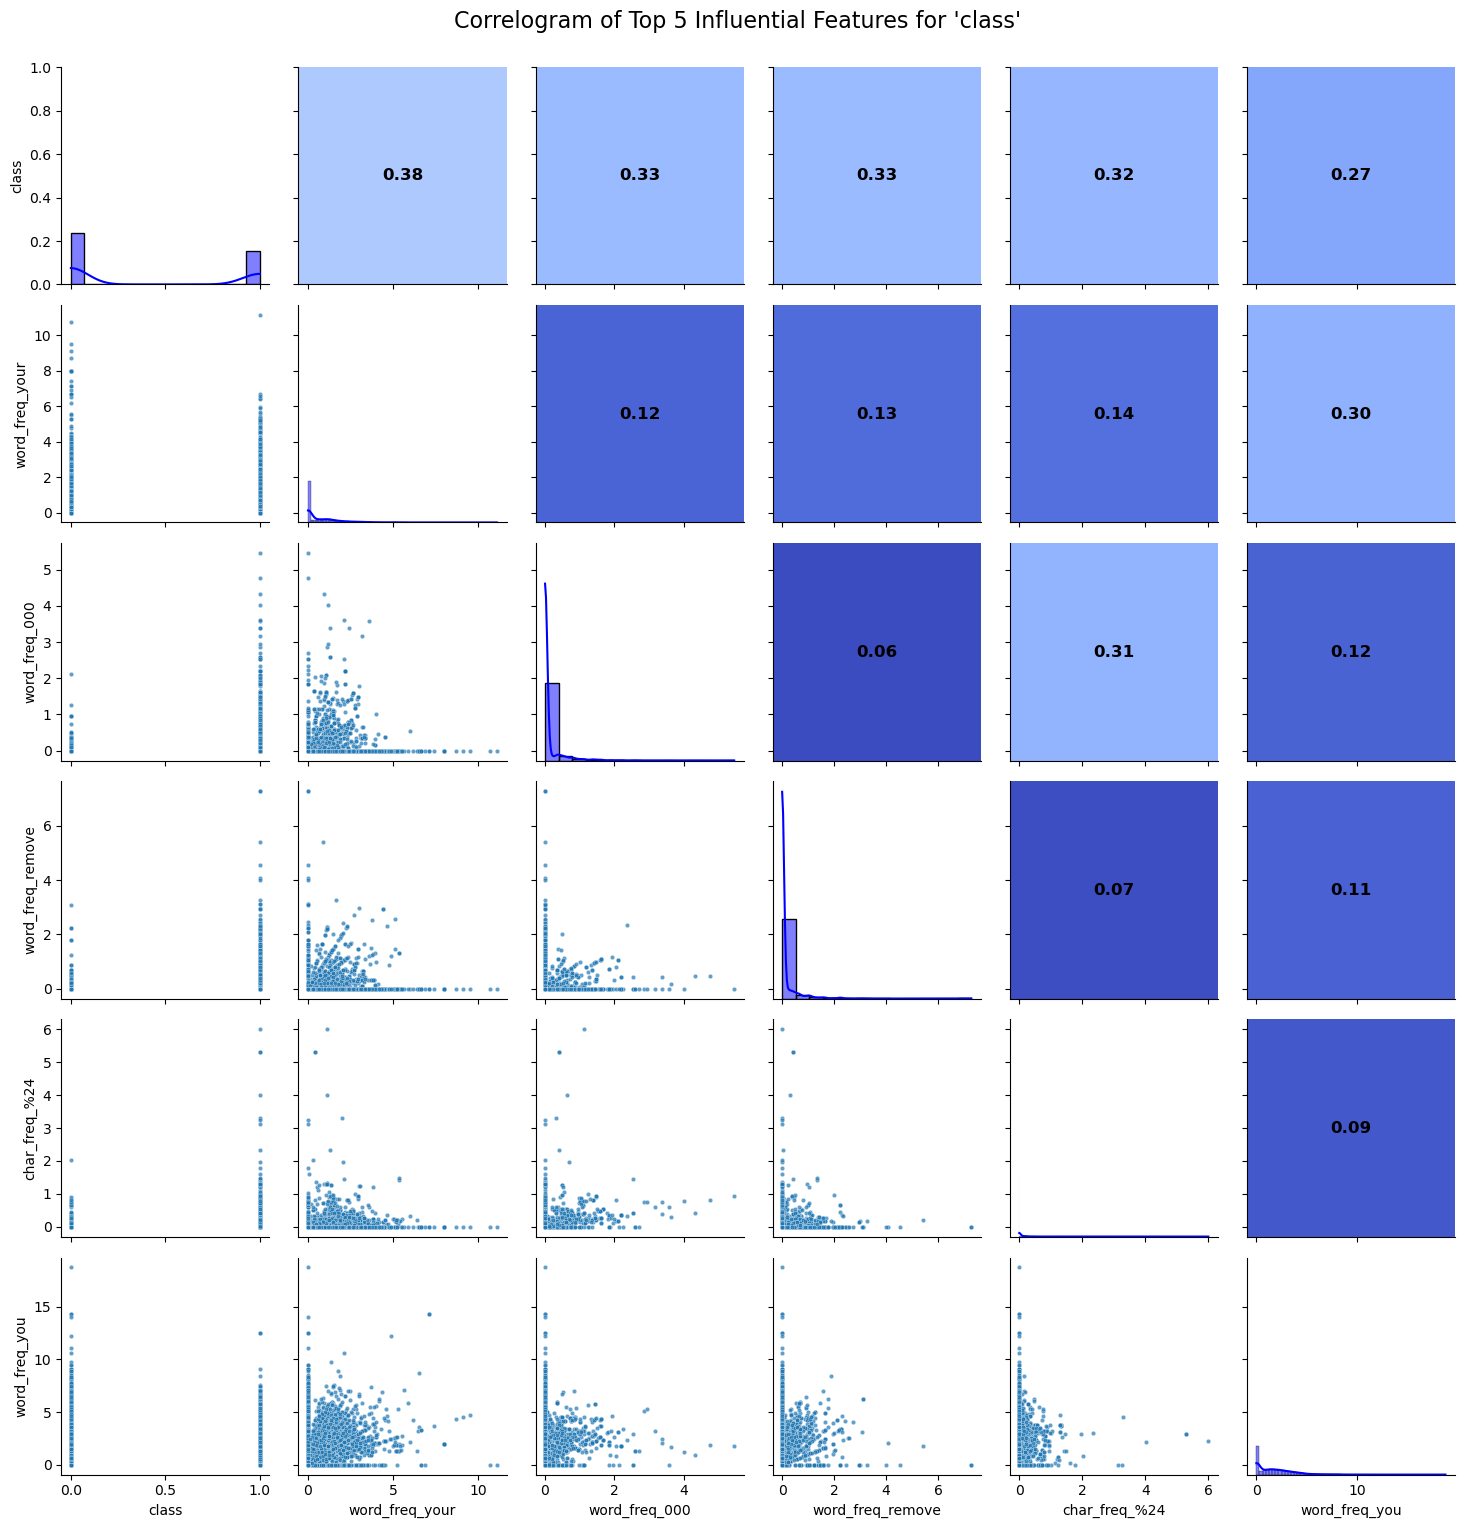

In [9]:
top_features = correlation_matrix['class'].abs().drop(index='class').nlargest(5).index

top_features = top_features.insert(0, 'class')

top_feature_data = dataset[top_features]

corr_matrix = top_feature_data.corr()
corr_min, corr_max = corr_matrix.min().min(), corr_matrix.max().max()

g = sns.PairGrid(top_feature_data)

g.map_lower(sns.scatterplot, alpha=0.7, s=10)

g.map_diag(sns.histplot, kde=True, color="blue")

g.map_upper(heatmap_corrfunc)

g.fig.suptitle("Correlogram of Top 5 Influential Features for 'class'", fontsize=16, y=1.02)
plt.show()



## Duplicates

In [10]:
dataset.duplicated().sum()

np.int64(391)

# Data processing

## Dropping duplicates

In [11]:
dataset = dataset.drop_duplicates()

# Creating a copy of the dataset after dealing with skew

In [12]:
exclude_columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']
unskewed_once_dataset = skewness_correction(dataset, skewed, exclude_columns)

Applying log transformation to right-skewed column: word_freq_make (skew=5.87)
Applying log transformation to right-skewed column: word_freq_address (skew=13.46)
Applying log transformation to right-skewed column: word_freq_all (skew=2.98)
Applying log transformation to right-skewed column: word_freq_3d (skew=27.21)
Applying log transformation to right-skewed column: word_freq_our (skew=4.70)
Applying log transformation to right-skewed column: word_freq_over (skew=6.12)
Applying log transformation to right-skewed column: word_freq_remove (skew=6.81)
Applying log transformation to right-skewed column: word_freq_internet (skew=9.73)
Applying log transformation to right-skewed column: word_freq_order (skew=5.28)
Applying log transformation to right-skewed column: word_freq_mail (skew=8.57)
Applying log transformation to right-skewed column: word_freq_receive (skew=5.08)
Applying log transformation to right-skewed column: word_freq_will (skew=2.83)
Applying log transformation to right-skew

# Dividing both datasets into training and test sets

In [13]:
x = dataset.drop(['class'], axis = 1)
y = dataset['class']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33, random_state=100)

In [14]:
x_unks = unskewed_once_dataset.drop(['class'], axis = 1)
y_unks = unskewed_once_dataset['class']

train_x_unks, test_x_unks, train_y_unks, test_y_unks = train_test_split(x_unks, y_unks, test_size = 0.33, random_state=100)

# Gridsearch

In [15]:
model = Pipeline([
    ('clf', RandomForestClassifier())
])

params = [
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [20, 40],
        'clf__max_depth': [None, 1, 4, 8, 12],
        'clf__min_samples_split': [2, 4, 8],
        'clf__min_samples_leaf': [1, 4, 8,],
        'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4],
    },
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 1, 4, 8],
        'clf__min_samples_split': [2, 4, 8],
        'clf__min_samples_leaf': [1, 4, 8],
        'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4],
    }
]

grid = GridSearchCV(model, params, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')
grid.fit(train_x, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [RandomForestClassifier()],
                          'clf__max_depth': [None, 1, 4, 8, 12],
                          'clf__min_samples_leaf': [1, 4, 8],
                          'clf__min_samples_split': [2, 4, 8],
                          'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4],
                          'clf__n_estimators': [20, 40]},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__max_depth': [None, 1, 4, 8],
                          'clf__min_samples_leaf': [1, 4, 8],
                          'clf__min_samples_split': [2, 4, 8],
                          'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4]}],
             refit='f1', scoring=['accuracy', 'f1'])

In [16]:
grid_unks = GridSearchCV(model, params, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')
grid_unks.fit(train_x_unks, train_y_unks)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [RandomForestClassifier()],
                          'clf__max_depth': [None, 1, 4, 8, 12],
                          'clf__min_samples_leaf': [1, 4, 8],
                          'clf__min_samples_split': [2, 4, 8],
                          'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4],
                          'clf__n_estimators': [20, 40]},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__max_depth': [None, 1, 4, 8],
                          'clf__min_samples_leaf': [1, 4, 8],
                          'clf__min_samples_split': [2, 4, 8],
                          'clf__min_weight_fraction_leaf': [0.0, 0.1, 0.4]}],
             refit='f1', scoring=['accuracy', 'f1'])

# Printing grid search results

In [17]:
def displmd(*args, **kwargs): 
              display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

cvres = grid.cv_results_
cvresults = pd.DataFrame(cvres)

displmd(
    "# Grid search results - all data - all params",
    "## ",
    cvresults[["mean_test_f1", "rank_test_f1", "mean_test_accuracy", "params"]]
    .sort_values(by="rank_test_f1")
    .apply(lambda x: ({"f1": f"${x['mean_test_f1']:.5f}$", "acc": f"${x['mean_test_accuracy']:.5f}$", "params": f"`{x['params']}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

# Grid search results - all data - all params

## 

|     | f1        | acc       | params                                                                                                                                                                              |
|----:|:----------|:----------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  13 | $0.91680$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   6 | $0.91680$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
|   7 | $0.91637$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   1 | $0.91627$ | $0.93617$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   0 | $0.91580$ | $0.93617$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 241 | $0.91077$ | $0.93298$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
|  18 | $0.91054$ | $0.93262$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 216 | $0.90980$ | $0.93191$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
| 229 | $0.90969$ | $0.93191$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
|  25 | $0.90937$ | $0.93156$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 235 | $0.90855$ | $0.93121$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 223 | $0.90820$ | $0.93050$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 168 | $0.90747$ | $0.93050$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`    |
|  49 | $0.90741$ | $0.93014$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 222 | $0.90738$ | $0.93014$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
|  30 | $0.90729$ | $0.92943$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 217 | $0.90694$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 228 | $0.90691$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
|  19 | $0.90684$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 247 | $0.90652$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |

In [18]:
cvres_unks = grid_unks.cv_results_
cvresults_unks = pd.DataFrame(cvres_unks)

displmd(
    "# Grid search unskewed results - all data - all params",
    "## ",
    cvresults[["mean_test_f1", "rank_test_f1", "mean_test_accuracy", "params"]]
    .sort_values(by="rank_test_f1")
    .apply(lambda x: ({"f1": f"${x['mean_test_f1']:.5f}$", "acc": f"${x['mean_test_accuracy']:.5f}$", "params": f"`{x['params']}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

# Grid search unskewed results - all data - all params

## 

|     | f1        | acc       | params                                                                                                                                                                              |
|----:|:----------|:----------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  13 | $0.91680$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   6 | $0.91680$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
|   7 | $0.91637$ | $0.93652$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   1 | $0.91627$ | $0.93617$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
|   0 | $0.91580$ | $0.93617$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 241 | $0.91077$ | $0.93298$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
|  18 | $0.91054$ | $0.93262$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 216 | $0.90980$ | $0.93191$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
| 229 | $0.90969$ | $0.93191$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
|  25 | $0.90937$ | $0.93156$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 235 | $0.90855$ | $0.93121$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 223 | $0.90820$ | $0.93050$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 168 | $0.90747$ | $0.93050$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`    |
|  49 | $0.90741$ | $0.93014$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 222 | $0.90738$ | $0.93014$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
|  30 | $0.90729$ | $0.92943$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}` |
| 217 | $0.90694$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |
| 228 | $0.90691$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 20}`   |
|  19 | $0.90684$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}` |
| 247 | $0.90652$ | $0.92979$ | `{'clf': RandomForestClassifier(), 'clf__max_depth': 12, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 8, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 40}`   |

# Visualisation of the grid search

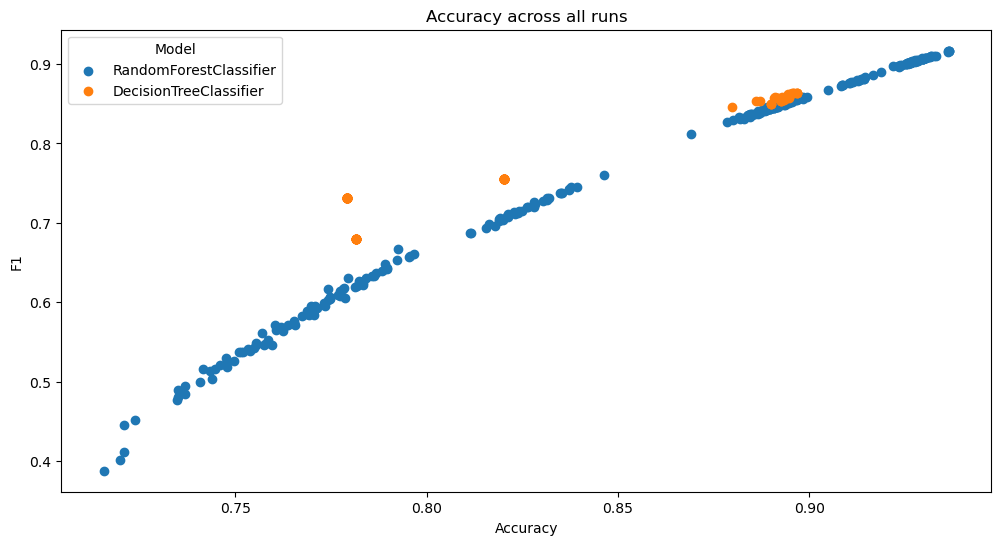

In [19]:
results = pd.DataFrame(grid.cv_results_)

results['model'] = results['param_clf'].apply(lambda x: type(x).__name__)

plt.figure(figsize=(12, 6))

for model_name in results['model'].unique():
    model_data = results[results['model'] == model_name]
    plt.scatter(
        model_data['mean_test_accuracy'],
        model_data['mean_test_f1'],
        label=model_name
    )

plt.title("Accuracy across all runs")
plt.xlabel("Accuracy")
plt.ylabel("F1")
plt.legend(title = "Model")

plt.show()

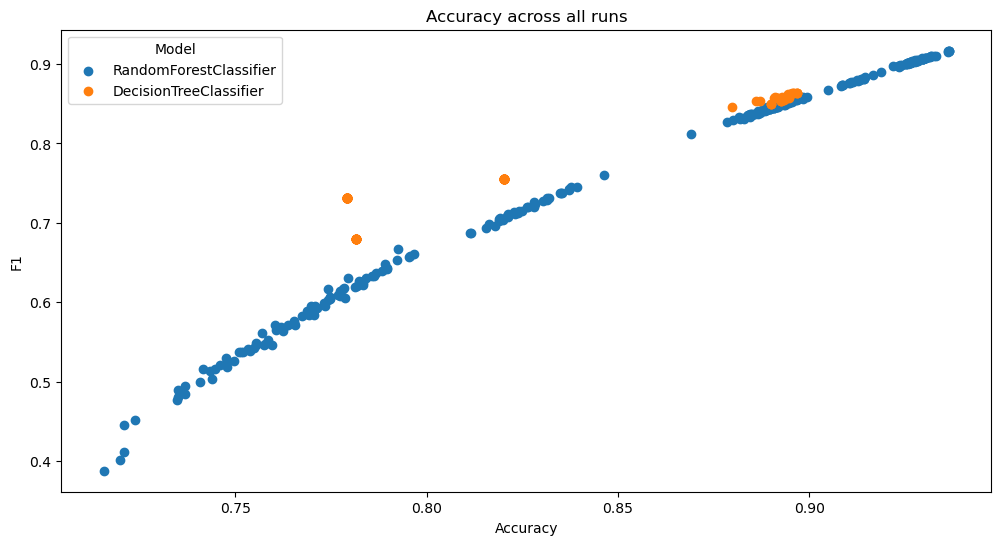

In [20]:
results_unks = pd.DataFrame(grid_unks.cv_results_)

results_unks['model'] = results_unks['param_clf'].apply(lambda x: type(x).__name__)

plt.figure(figsize=(12, 6))

for model_name in results_unks['model'].unique():
    model_data = results[results['model'] == model_name]
    plt.scatter(
        model_data['mean_test_accuracy'],
        model_data['mean_test_f1'],
        label=model_name
    )

plt.title("Accuracy across all runs")
plt.xlabel("Accuracy")
plt.ylabel("F1")
plt.legend(title = "Model")

plt.show()

# Retraining on whole dataset

In [21]:
model = grid.best_estimator_

model.fit(train_x, train_y)

model.score(test_x, test_y)

0.9417266187050359

In [22]:
model_unks = grid.best_estimator_

model_unks.fit(train_x_unks, train_y_unks)

model_unks.score(test_x_unks, test_y_unks)

0.9510791366906475

In [23]:
METRICS = [
    (f1_score, "f1_score"),
    (accuracy_score, "accuracy"),
    (recall_score, "recall"),
]

def validate(y_pred_test, y_pred_train, train_y, test_y, title="Model Evaluation"):
    outcomes = []

    for m, name in METRICS:
        outcomes.append([name, m(test_y, y_pred_test), m(train_y, y_pred_train)])

    df = pd.DataFrame(outcomes, columns=['metric', 'test', 'train'])
    df = df.set_index('metric')

    print(title)
    print(df)

    displmd(
        f"# {title}",
        f"## Valitation output",
        df.to_markdown()
    )
    
    cm_test = confusion_matrix(test_y, y_pred_test)
    cm_train = confusion_matrix(train_y, y_pred_train)

    fig, axs = plt.subplots(1, 2)

    # set size
    fig.set_size_inches(12, 5)

    axs[0].set_title('Test Confusion Matrix')
    axs[0].matshow(cm_test, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_test):
        axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    axs[1].set_title('Train Confusion Matrix')
    axs[1].matshow(cm_train, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_train):
        axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.show()

Model Evaluation
              test     train
metric                      
f1_score  0.938422  0.972727
accuracy  0.948921  0.978723
recall    0.932759  0.973612


# Model Evaluation

## Valitation output

| metric   |     test |    train |
|:---------|---------:|---------:|
| f1_score | 0.938422 | 0.972727 |
| accuracy | 0.948921 | 0.978723 |
| recall   | 0.932759 | 0.973612 |

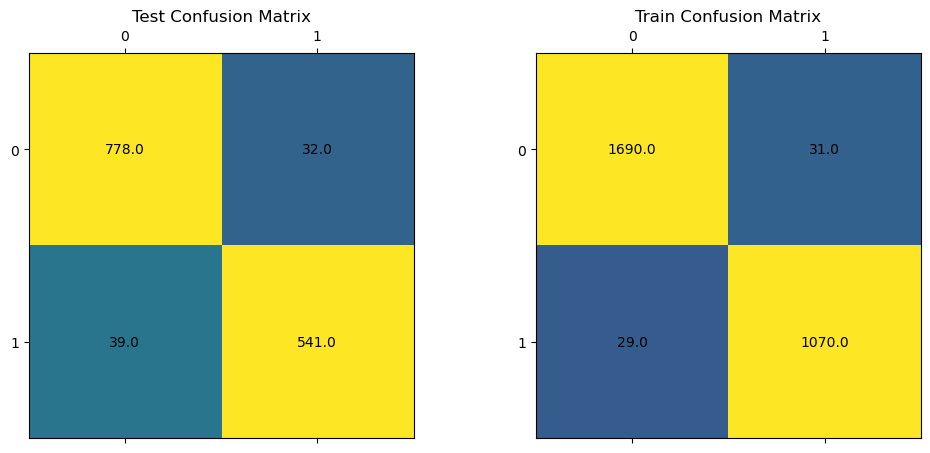

In [24]:
test_y_prediction = model.predict(test_x)
train_y_prediction = model.predict(train_x)

validate(test_y_prediction, train_y_prediction, train_y, test_y)

Model Evaluation
              test     train
metric                      
f1_score  0.940663  0.983532
accuracy  0.951079  0.987234
recall    0.929310  0.978162


# Model Evaluation

## Valitation output

| metric   |     test |    train |
|:---------|---------:|---------:|
| f1_score | 0.940663 | 0.983532 |
| accuracy | 0.951079 | 0.987234 |
| recall   | 0.92931  | 0.978162 |

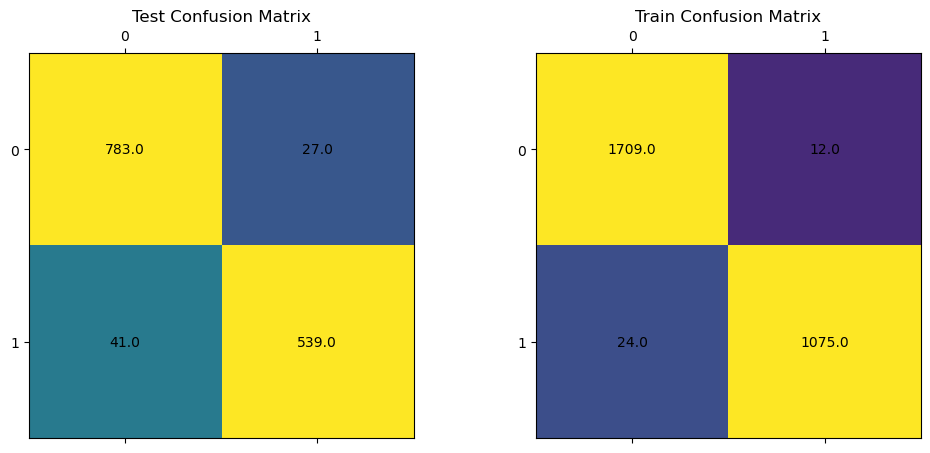

In [25]:
test_y_unks_prediction = model_unks.predict(test_x_unks)
train_y_unks_prediction = model_unks.predict(train_x_unks)

validate(test_y_unks_prediction, train_y_unks_prediction, train_y_unks, test_y_unks)